In [1]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

## Подготовка данных

Загрузка данных

In [2]:
news = fetch_20newsgroups(subset='all')

Описание и структура датасета

In [3]:
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

Информация о количественных параметрах датасета

In [4]:
print(f"Количество текстов в датасете: {len(news['data'])}")

Количество текстов в датасете: 18846


Точка данных

In [5]:
print(news['data'][0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [6]:
print(news['target'][0])

10


In [7]:
X = pd.DataFrame(news['data'])
y = news['target']

Разделение на тестовую и обучающую выборки

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=7)

In [9]:
cv = CountVectorizer()
X_train = cv.fit_transform(X_train.values.reshape(-1, ))
X_test = cv.transform(X_test.values.reshape(-1, ))

Функции для моделирования

In [10]:
def draw_heat(y_test, y_pred):
    class_names = [0, 1]
    fig, ax = plt.subplots(figsize=(8,6))
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)

    sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_pred)),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()

In [11]:
def full_build(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    draw_heat(y_test, y_pred)
    print('Метрика достоверности предсказания:')
    print(metrics.accuracy_score(y_test, y_pred))
    print('Метрика точности:')
    print(metrics.precision_score(y_test, y_pred, average='macro', zero_division=0))
    print('Метрика полноты')
    print(metrics.recall_score(y_test, y_pred, average='macro', zero_division=0))

In [19]:
# Обучающие кривые
def plot_with_err(x, data, **kwargs):
    data_mean, data_std = data.mean(axis=1), data.std(axis=1)
    lines = plt.plot(x, data_mean, '-', **kwargs)
    plt.fill_between(x, data_mean - data_std, data_mean + data_std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)
                     
def print_learning_curve(model, x_train, y_train):
    train_sizes = np.linspace(0.1, 1, 10)
    _, train_scores, val_scores = learning_curve(
        model, x_train, y_train, train_sizes=train_sizes, cv=3)
    plt.figure('Обучающие кривые')
    plt.title('Обучающие кривые')
    plt.xlabel('Размер тренировочной выборки')
    plt.ylabel('Эффективность')
    plot_with_err(train_sizes, train_scores,
                  label='Обучающая эффективность', color='red')
    plot_with_err(train_sizes, val_scores,
                  label='Тестовая эффективность', color='orange')
    plt.legend()
    plt.show()


## Наивный байесовский классификатор

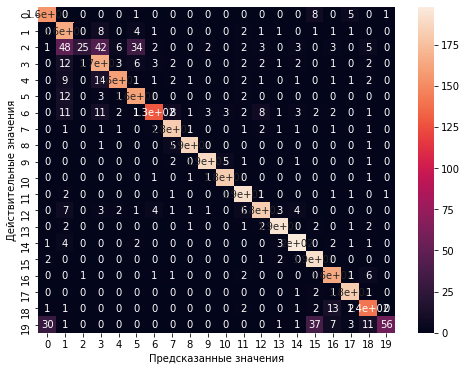

Метрика достоверности предсказания:
0.8488063660477454
Метрика точности:
0.864874686514951
Метрика полноты
0.8403551725010596


In [20]:
mnb = MultinomialNB()
full_build(mnb, X_train, X_test, y_train, y_test)

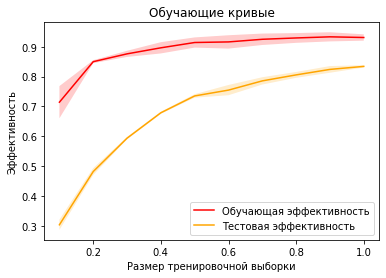

In [21]:
print_learning_curve(mnb, X_train, y_train)

## Логистическая регрессия

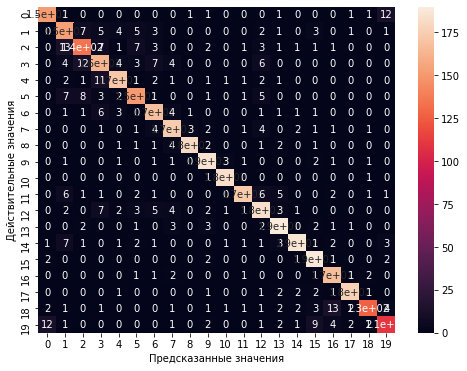

Метрика достоверности предсказания:
0.8811671087533156
Метрика точности:
0.8817299885406499
Метрика полноты
0.8787787111320865


In [22]:
logreg = LogisticRegression()
full_build(logreg, X_train, X_test, y_train, y_test)

In [ ]:
print_learning_curve(logreg, X_train, y_train)

## Метод опорных векторов с гауссовым ядром 

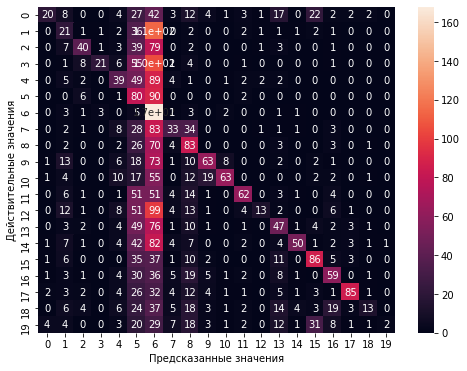

Метрика достоверности предсказания:
0.2779840848806366
Метрика точности:
0.5275642595854869
Метрика полноты
0.2756338220077886


In [23]:
svcg = SVC(kernel='rbf')
full_build(svcg, X_train, X_test, y_train, y_test)

In [ ]:
print_learning_curve(svcg, X_train, y_train)

## Метод опорных векторов с полиномиальным ядром 

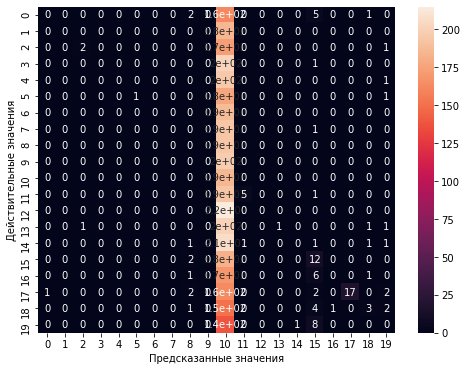

Метрика достоверности предсказания:
0.06021220159151194
Метрика точности:
0.2635947079687825
Метрика полноты
0.06086476102374823


In [24]:
svcp = SVC(kernel='poly')
full_build(svcp, X_train, X_test, y_train, y_test)

In [ ]:
print_learning_curve(svcp, X_train, y_train)

## Метод k ближайших соседей 

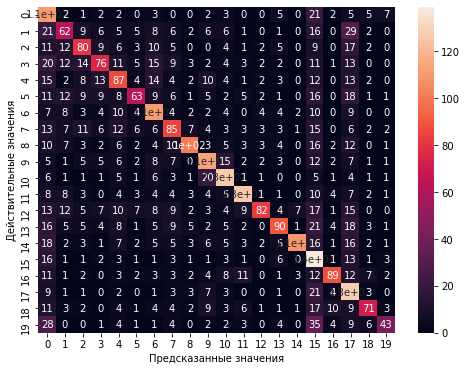

Метрика достоверности предсказания:
0.5023872679045093
Метрика точности:
0.5566532516354867
Метрика полноты
0.5005879554635335


In [25]:
knc = KNeighborsClassifier()
full_build(knc, X_train, X_test, y_train, y_test)

In [ ]:
print_learning_curve(knc, X_train, y_train)

## Многослойный перцептрон 

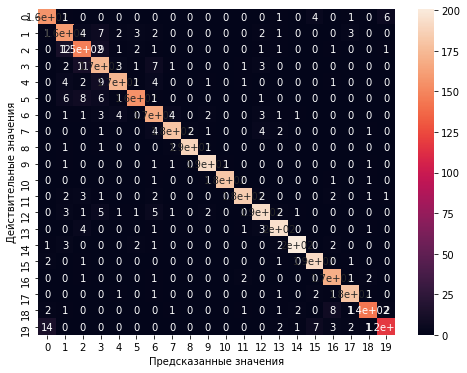

Метрика достоверности предсказания:
0.9161803713527852
Метрика точности:
0.9171368036696647
Метрика полноты
0.9140895948881432


In [26]:
mpl = MLPClassifier()
full_build(mpl, X_train, X_test, y_train, y_test)

In [ ]:
print_learning_curve(mpl, X_train, y_train)

## Вывод

Среди всех моделей лучший результат показал многослойный перцептрон, но время выполнения очень велико. Поэтому Наивный байесовский классификатор является лучшим решением для классификации текстов в данной работе